In [1]:
import os, os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import ipywidgets as widgets
from IPython.display import clear_output
from pathlib import Path
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

plt.rcParams['figure.figsize'] = [20, 10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\casbe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataPath = os.getcwd() + '/data/data3/'
caseCount = len(os.listdir(dataPath))
data = []
try:
    os.remove(dataPath + ".DS_Store")
except:
    print("No file DS_Store")
for filename in os.listdir(dataPath):
    f = open(os.path.join(dataPath, filename), encoding='utf-8')
    data.append([filename.replace('.txt', ''), f.read()])

verdict_df = pd.DataFrame(data, columns=['Case ID', 'Case Text'])
cases_df = pd.read_csv('./cases3.csv', usecols = ['GerechtelijkProductType', 'Case ID', 'Proceduresoorten', 'Publicatiedatum', 'Rechtsgebieden', 'Tekstfragment', 'Titel', 'Uitspraakdatum', 'UitspraakdatumType'])
merged_df = cases_df.join(verdict_df.set_index('Case ID'), on='Case ID', how='left')

No file DS_Store


In [3]:
def count_mentions(word_arr):
    dates = []
    counts = []
    for i in range(len(merged_df)):
        current = merged_df.iloc[i]
        current_date = current["Uitspraakdatum"]
        
        current_case_text = current['Case Text']
        occurrences = 0
        for i in word_arr:
            occurrences = occurrences + current_case_text.lower().count(i.lower())
        dates.append(current_date)
        counts.append(occurrences)

    dates = pd.Series(dates)
    counts = pd.Series(counts)
    frame = { 'date': dates, 'count': counts }
    results = pd.DataFrame(frame)
    return results

In [4]:
def count_cases(word_arr):
    dates = []
    counts = []
    for i in range(len(merged_df)):
        current = merged_df.iloc[i]
        current_date = current['Uitspraakdatum']
        current_case_text = current['Case Text']
        occurrences = 0
        if any(x.lower() in current_case_text.lower() for x in word_arr):
            occurrences = 1
        dates.append(current_date)
        counts.append(occurrences)
    
    dates = pd.Series(dates)
    counts = pd.Series(counts)
    frame = { 'date': dates, 'count': counts }
    results = pd.DataFrame(frame)
    return results

In [5]:
mdma_results = count_mentions(['XTC'])
mdma_results.set_index('date', inplace=True)
mdma_results.index = pd.to_datetime(mdma_results.index)
daily_mdma_result = mdma_results.resample('1M').sum()

mdma_cases_results = count_cases(['XTC'])
mdma_cases_results.set_index('date', inplace=True)
mdma_cases_results.index = pd.to_datetime(mdma_cases_results.index)
daily_mdma_cases_result = mdma_cases_results.resample('1M').sum()

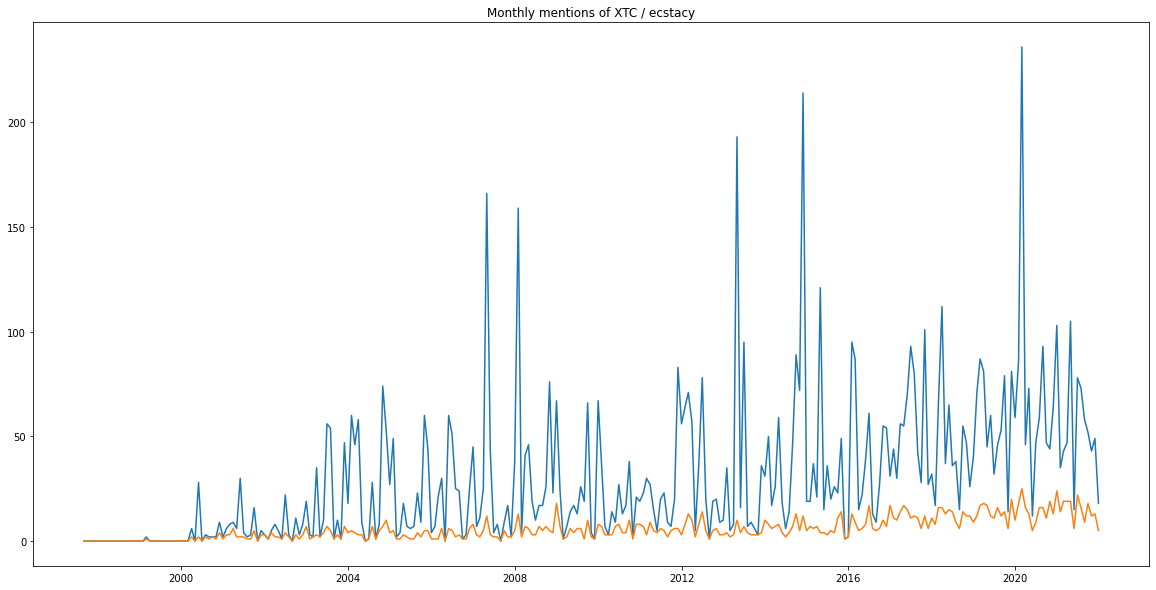

In [6]:
plt.plot(daily_mdma_result[220:])
plt.plot(daily_mdma_cases_result[220:])

plt.title("Monthly mentions of XTC / ecstacy")
plt.show()

<h3>Term Frequency - Inverse Document Frequency </h3>
Each term is weighted by dividing the term frequency by the number of documents in the corpus containing the word 

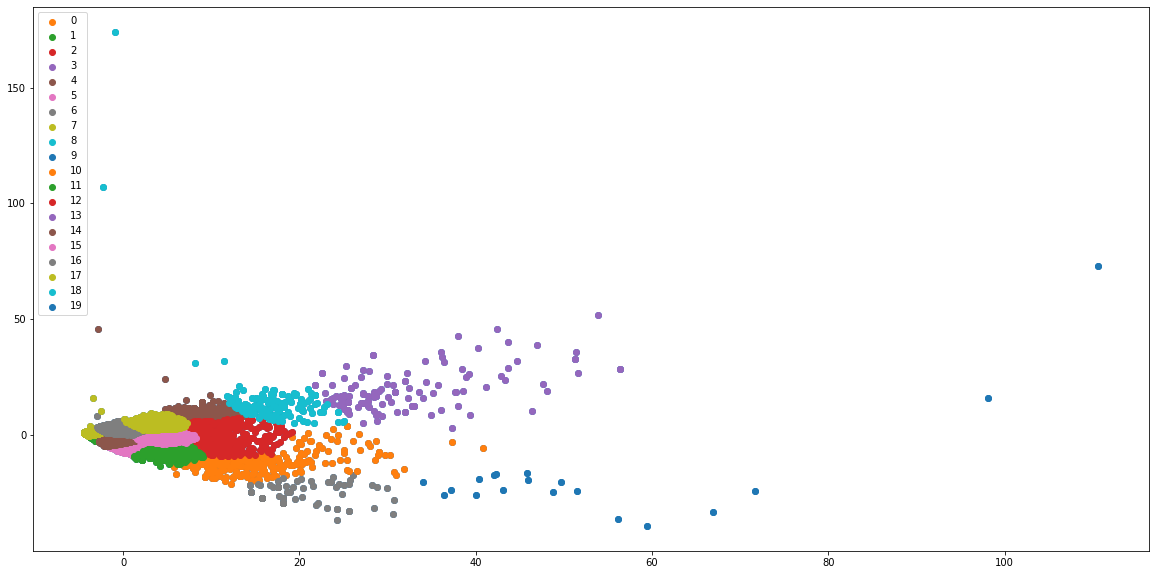

In [150]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

delete_outliers = False

vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=stopwords.words('dutch'), use_idf=True, norm=None, lowercase=True)

transformed_documents = vectorizer.fit_transform(merged_df['Tekstfragment'])

transformed_documents_as_array = transformed_documents.toarray()
pca = PCA(n_components=2).fit(transformed_documents_as_array)
data2D = pca.transform(transformed_documents_as_array)

if delete_outliers == True:
    x_outlier = np.where(data2D[:,0] > 60)
    y_outlier = np.where(data2D[:,1] > 50)
    total_to_delete = np.append(np.asarray(x_outlier), np.asarray(y_outlier))
    data2D = np.delete(data2D, total_to_delete, axis=0)

plt.scatter(data2D[:,0], data2D[:,1])

plt.show()

true_k = 20
kmeans = KMeans(n_clusters= true_k, init='k-means++', max_iter=100)
label = kmeans.fit_predict(data2D)

#Unique labels:
u_labels = np.unique(label)
#Plot k means results:
for i in u_labels:
    plt.scatter(data2D[label == i , 0] , data2D[label == i , 1] , label = i)
plt.legend()

plt.show()





In [ ]:
merged_df["K means cluster"] = label

In [190]:
bab = merged_df['Tekstfragment'][5]
print(bab)

babb = merged_df['Case Text'][5]
print(babb)

ontbinding ernstig verwijtbaar gedrag. Onder invloed drugs. trambestuurder GVB. risicovol gedrag. onoplettendheid. gebruik drugs in privé tijd.













 
RECHTBANK AMSTERDAM

Afdeling privaatrecht
 

zaaknummer: 9030252  EA VERZ 21-98
beschikking van:  13 april 2021
func.:  47653
 
beschikking van de kantonrechter

I n z a k e
 
de besloten vennootschap met beperkte aansprakelijkheid GVB Exploitatie B.V.

gevestigd te Amsterdam
verzoekster
nader te noemen: GVB 
gemachtigde: mr. D. van Dam
 

t e g e n
 

      [verweerder]
    

wonende te [woonplaats]
verweerder
nader te noemen: [verweerder]
gemachtigde: mr. P. Goettsch.
 
Verloop van de procedure

GVB heeft op 11 februari 2021 een verzoekschrift als bedoeld in artikel 7:617b BW ingediend tot ontbinding van de arbeidsovereenkomst met [verweerder]  met producties. [verweerder] heeft een verweerschrift ingediend alsmede producties. 
 

De mondelinge behandeling van het verzoek heeft plaatsgevonden ter zitting van 23 maart 2021. GVB

In [199]:
tempdf = merged_df["Case Text"][:1000]

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

delete_outliers = False

vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=stopwords.words('dutch'), use_idf=True, norm=None, lowercase=True)

transformed_documents = vectorizer.fit_transform(tempdf)

transformed_documents_as_array = transformed_documents.toarray()
pca = PCA(n_components=2).fit(transformed_documents_as_array)
data2D = pca.transform(transformed_documents_as_array)

if delete_outliers == True:
    x_outlier = np.where(data2D[:,0] > 60)
    y_outlier = np.where(data2D[:,1] > 50)
    total_to_delete = np.append(np.asarray(x_outlier), np.asarray(y_outlier))
    data2D = np.delete(data2D, total_to_delete, axis=0)

plt.scatter(data2D[:,0], data2D[:,1])

plt.show()

true_k = 20
kmeans = KMeans(n_clusters= true_k, init='k-means++', max_iter=100)
label = kmeans.fit_predict(data2D)

#Unique labels:
u_labels = np.unique(label)
#Plot k means results:
for i in u_labels:
    plt.scatter(data2D[label == i , 0] , data2D[label == i , 1] , label = i)
plt.legend()

plt.show()


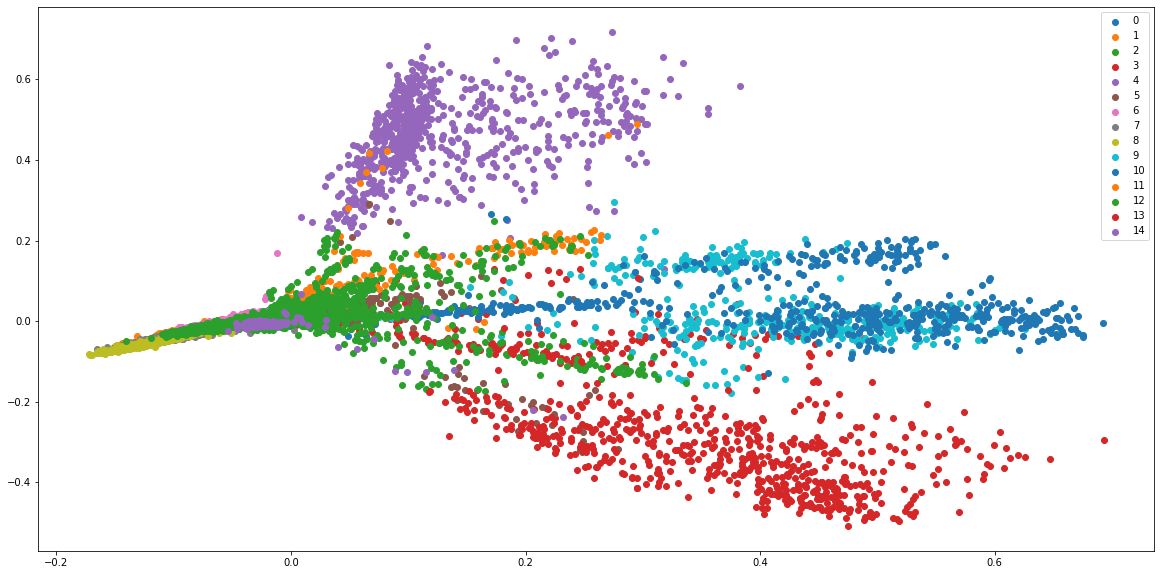

Top terms per cluster:
Cluster 0:
 minderjarige
 moeder
 vader
 gi
 kind
 ouders
 gezag
 kinderen
 kinderrechter
 uithuisplaatsing
 ondertoezichtstelling
 machtiging
 omgang
 jeugdzorg
 omgangsregeling
 minderjarigen
 hulpverlening
 opvoeding
 pleegouders
 stichting
Cluster 1:
 munitie
 wapens
 vuurwapen
 wapen
 categorie
 kaliber
 iii
 pistool
 patronen
 mm
 rotterdam
 vuurwapens
 geschoten
 hennep
 kogelpatronen
 revolver
 mdma
 doorzoeking
 amfetamine
 geldbedrag
Cluster 2:
 aangeefster
 terbeschikkinggestelde
 terbeschikkingstelling
 kliniek
 tbs
 verlenging
 verpleging
 verplichte
 zorg
 beëindiging
 overheidswege
 dwangverpleging
 zorgmachtiging
 psychiater
 advies
 medicatie
 stoornis
 deskundige
 begeleiding
 wvggz
Cluster 3:
 eiseres
 verweerder
 sluiting
 burgemeester
 gemachtigde
 gedaagde
 awb
 13b
 voorzieningenrechter
 ongegrond
 bezwaar
 bibob
 beleid
 primaire
 vergunning
 coffeeshop
 bestuursdwang
 bestuursrecht
 sub
 eisers
Cluster 4:
 appellant
 burgemeester
 cbr
 ge

C:\Users\casbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA


documents = merged_df["Case Text"]

vectorizer = TfidfVectorizer(max_df=0.2, min_df=10, stop_words=stopwords.words('dutch'), use_idf=True,  lowercase=True)

X = vectorizer.fit_transform(documents)
X = X.astype('float32')
true_k = 15
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200)

labels = model.fit_predict(X)
merged_df["K means cluster"] = labels

X_array = X.toarray()
pca = PCA(n_components=2).fit(X_array)
XPCA = pca.transform(X_array)

u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(XPCA[labels == i , 0] , XPCA[labels == i , 1] , label = i)
plt.legend()
plt.show()


print("Top terms per cluster:")
terms_df = pd.DataFrame()
for i in range(true_k):
    curr = []
    for ind in order_centroids[i, :25]:
        curr.append(terms[ind])
    terms_df[i] = curr

print(terms_df)

In [52]:
terms_df = pd.DataFrame()
for i in range(true_k):
    curr = []
    for ind in order_centroids[i, :50]:
        curr.append(terms[ind])
    terms_df[i] = curr

print(terms_df)
terms_df.to_csv("K-means terms.csv")


                       0               1                       2   \
0            minderjarige         munitie             aangeefster   
1                  moeder          wapens  terbeschikkinggestelde   
2                   vader       vuurwapen  terbeschikkingstelling   
3                      gi           wapen                 kliniek   
4                    kind       categorie                     tbs   
5                  ouders         kaliber              verlenging   
6                   gezag             iii              verpleging   
7                kinderen         pistool              verplichte   
8           kinderrechter        patronen                    zorg   
9        uithuisplaatsing              mm             beëindiging   
10  ondertoezichtstelling       rotterdam           overheidswege   
11             machtiging      vuurwapens         dwangverpleging   
12                 omgang       geschoten          zorgmachtiging   
13              jeugdzorg         

In [ ]:
# make the output folder if it doesn't already exist
Path("./tf_idf_output").mkdir(parents=True, exist_ok=True)

# construct a list of output file paths using the previous list of text files the relative path for tf_idf_output
output_filenames = ["tf_idf_output/" + file + '.csv' for file in merged_df['Case ID']]
output_dates = [date for date in merged_df['Uitspraakdatum']]

tf_idf_df = []

# loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
for counter, doc in enumerate(transformed_documents_as_array):
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    d = {
        "Case ID": output_filenames[counter],
        "Date": output_dates[counter],
        "1": one_doc_as_df.iloc[0].term,
        "1 score": one_doc_as_df.iloc[0].score,
        "2": one_doc_as_df.iloc[1].term,
        "2 score": one_doc_as_df.iloc[1].score,
        "3": one_doc_as_df.iloc[2].term,
        "3 score": one_doc_as_df.iloc[2].score,
        "4": one_doc_as_df.iloc[3].term,
        "4 score": one_doc_as_df.iloc[3].score,
        "5": one_doc_as_df.iloc[4].term,
        "5 score": one_doc_as_df.iloc[4].score,
        "6": one_doc_as_df.iloc[5].term,
        "6 score": one_doc_as_df.iloc[5].score,
        "7": one_doc_as_df.iloc[6].term,
        "7 score": one_doc_as_df.iloc[6].score,
        "8": one_doc_as_df.iloc[7].term,
        "8 score": one_doc_as_df.iloc[7].score,
        "9": one_doc_as_df.iloc[8].term,
        "9 score": one_doc_as_df.iloc[8].score,
        "10": one_doc_as_df.iloc[9].term,
        "10 score": one_doc_as_df.iloc[9].score
    }
    tf_idf_df.append(d)
    one_doc_as_df.to_csv(output_filenames[counter])
    
tf_idf_df = pd.DataFrame(tf_idf_df)
print(tf_idf_df)

In [68]:
tf_idf_df.to_csv("copmlete_tf_idf_df.csv")

In [8]:
tf_idf_df = pd.read_csv("copmlete_tf_idf_df.csv")
print(tf_idf_df.iloc[0])t

Unnamed: 0                                            0
Case ID       tf_idf_output/ECLI-NL-RBNNE-2021-5018.csv
Date                                         01-10-2021
1                                          synthetische
1 score                                        10.72019
2                                             productie
2 score                                        9.734739
3                                                 drugs
3 score                                        6.681436
4                                                 forse
4 score                                        6.267457
5                                              recidive
5 score                                        6.066786
6                                            medeplegen
6 score                                        3.266185
7                                              passeert
7 score                                             0.0
8                                               